In [1]:
import gymnasium as gym
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import discretizers as disc
from agents import SARSA, QLearning#, experiment

In [2]:
def plotExperiment(subjects, axs, title=None, xlabel=None, ylabel=None):
    data = pd.DataFrame(data={'subject':[], 'episode':[], 'R':[]})
    for i, subject in enumerate(subjects):
        info = subject.data[['episode', 'R']].groupby(['episode']).sum().reset_index()
        info['subject'] = i
        data = pd.concat([data, info], ignore_index=True)
    
    axs.plot(data[['episode', 'R']].groupby(['episode']).mean().R)
    
    if title is not None:
        axs.set_title(title)
    if xlabel is not None:
        axs.set_xlabel(xlabel)
    if ylabel is not None:
        axs.set_ylabel(ylabel)



def experiment(modelClass, hyper_params, episodes=1000, n_subjects=5):
    env = gym.make("CartPole-v1", render_mode="rgb_array")
    _, axs = plt.subplots(len(hyper_params), 1, figsize=(10, 5*len(hyper_params)))
    
    subjects = []
    for i, param in enumerate(hyper_params):
        for _ in range(n_subjects):
            model = modelClass(env, **param)
            model.train(episodes=episodes)
            subjects.append(model)

        if len(hyper_params) == 1:
            axs = [axs]

        plotExperiment(subjects, axs[i], title=param['title'])


# Experimentos

## Discretizers

In [ ]:
hyper_params = [
        {'title': 'small', "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state},
        {'title': 'big', "state_shape": (100, 100, 100, 100), "discretizer":disc.simple_discretized_state},
        {'title': 'mixed', "state_shape": (10, 10, 100, 100), "discretizer":disc.simple_discretized_state}
    ]

experiment(SARSA, hyper_params)

### simple_discretized_state

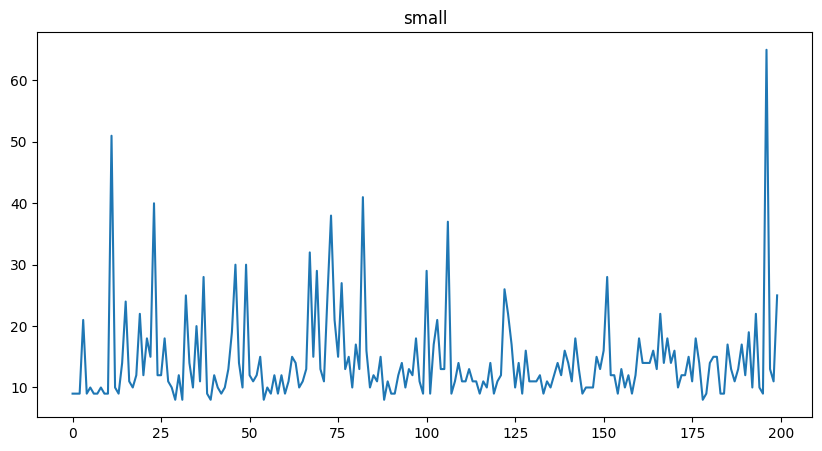

In [26]:
hyper_params = [
        {'title': 'small', "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state},
    ]

experiment(SARSA, hyper_params, episodes=200, n_subjects=100)

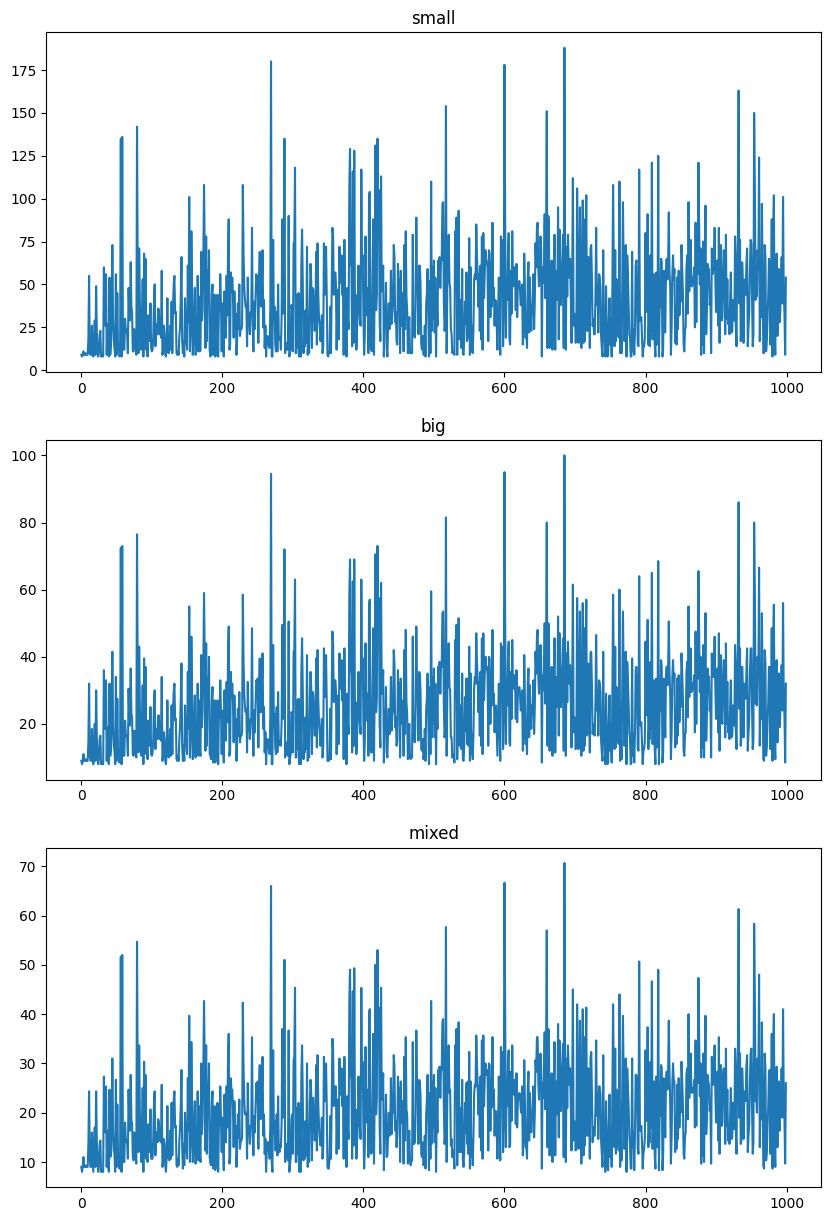

In [5]:
experiment(QLearning, hyper_params)

### discretize_state_scaler

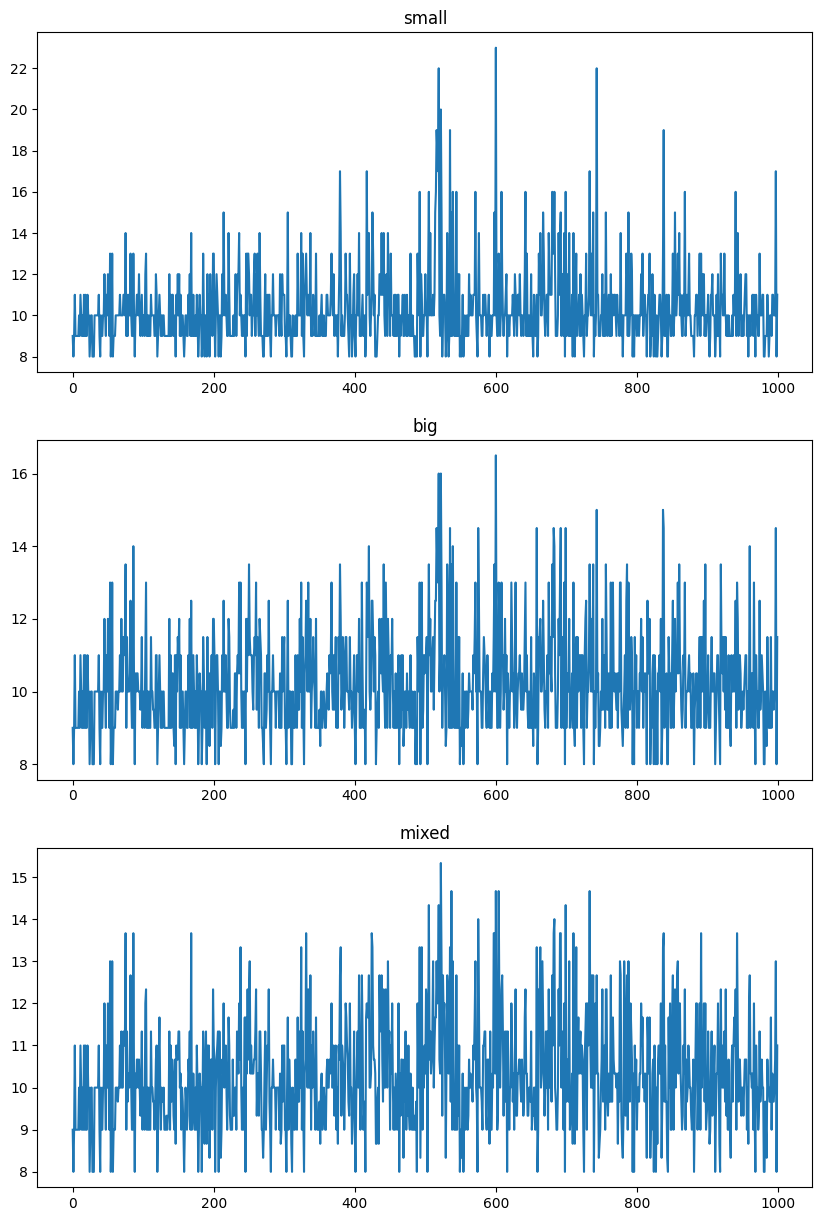

In [6]:
hyper_params = [
        {'title': 'small', "state_shape": (10, 10, 10, 10), "discretizer":disc.discretize_state_scaler},
        {'title': 'big', "state_shape": (100, 100, 100, 100), "discretizer":disc.discretize_state_scaler},
        {'title': 'mixed', "state_shape": (10, 10, 100, 100), "discretizer":disc.discretize_state_scaler}
    ]

experiment(SARSA, hyper_params)

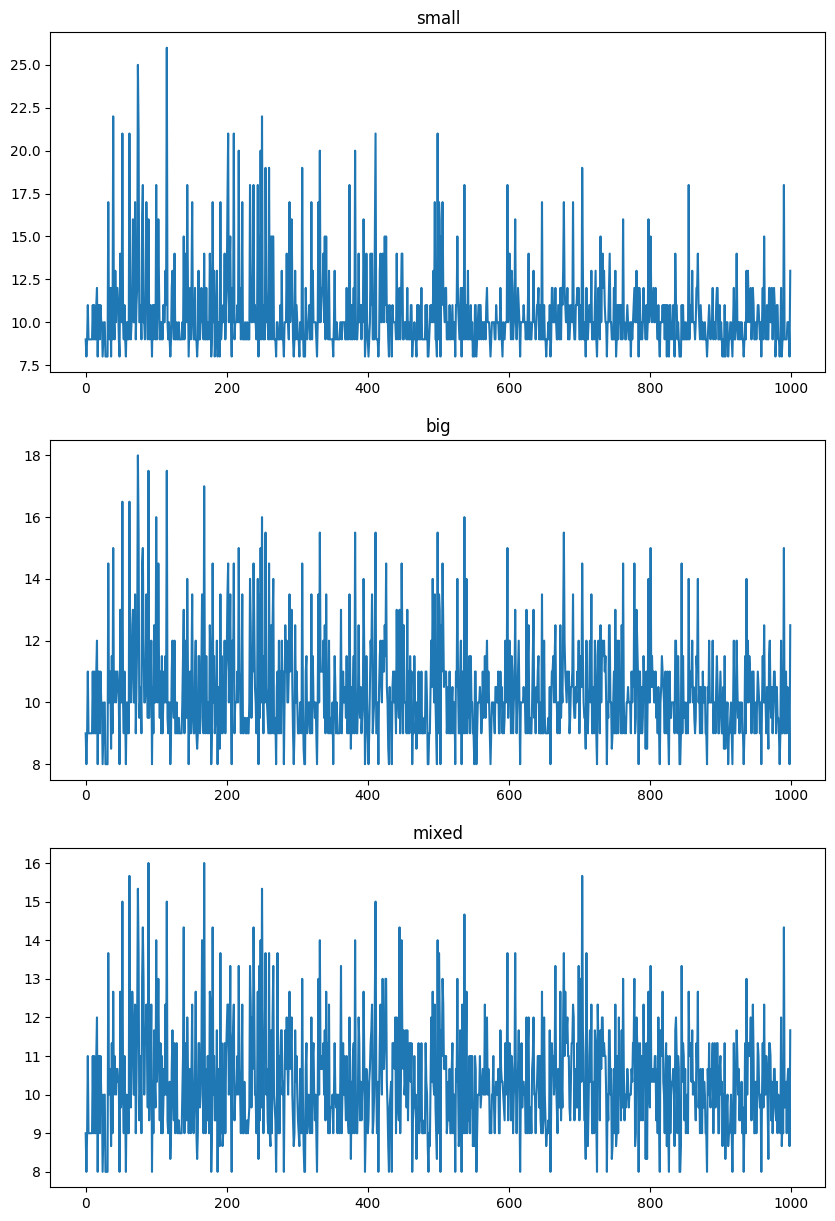

In [7]:
experiment(QLearning, hyper_params)

### discretize_state_normalized

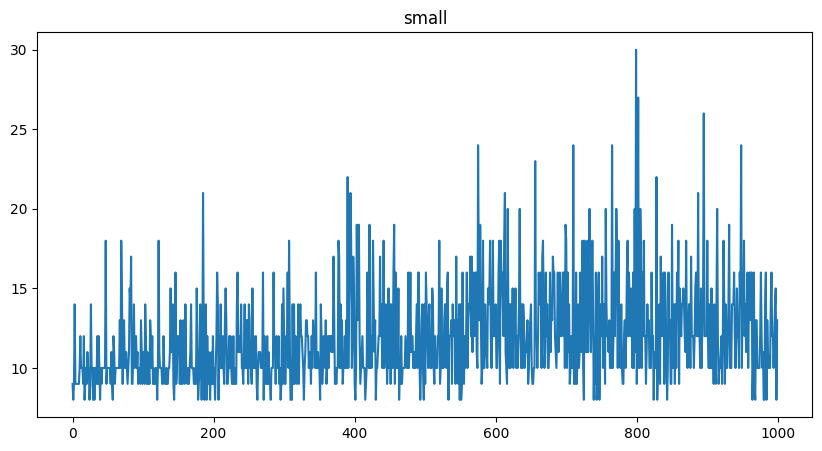

In [8]:
hyper_params = [
        {'title': 'small', "state_shape": (30, 30, 50, 50), "discretizer":disc.discretize_state_normalized},
    ]

experiment(SARSA, hyper_params)

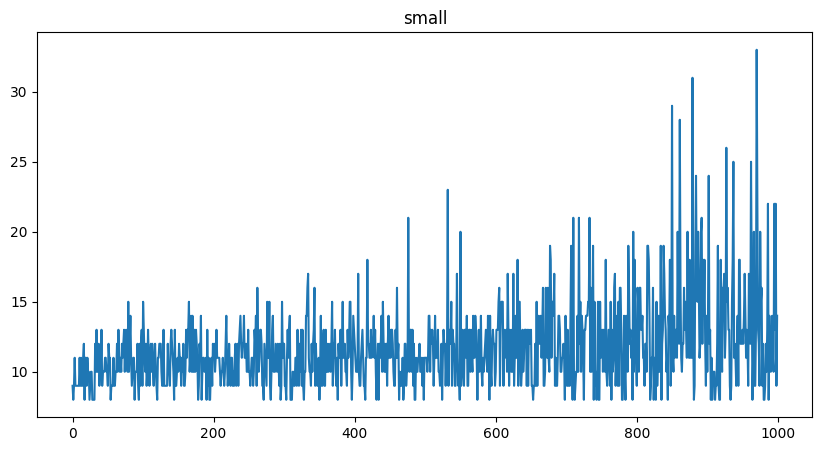

In [9]:
experiment(QLearning, hyper_params)

### discretize_state_min_max

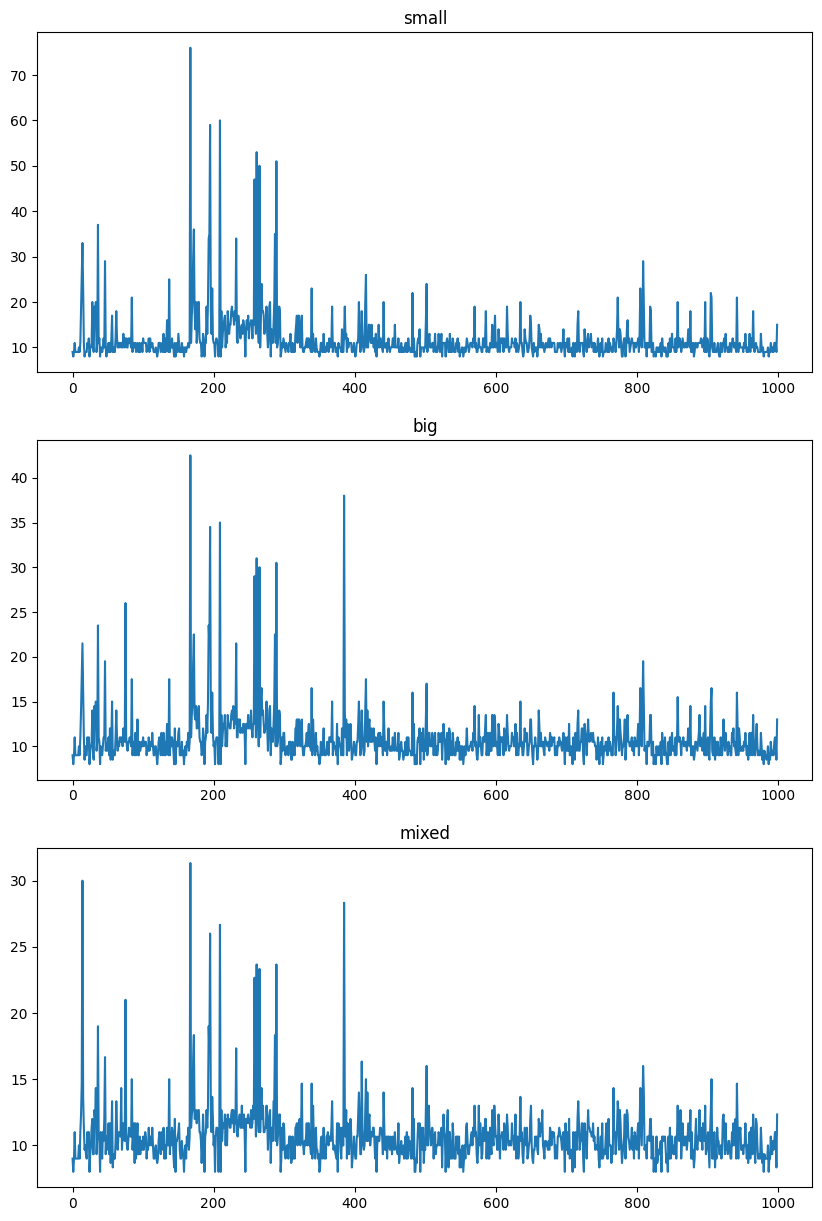

In [10]:
hyper_params = [
        {'title': 'small', "state_shape": (10, 10, 10, 10), "discretizer":disc.discretize_state_min_max},
        {'title': 'big', "state_shape": (100, 100, 100, 100), "discretizer":disc.discretize_state_min_max},
        {'title': 'mixed', "state_shape": (10, 10, 100, 100), "discretizer":disc.discretize_state_min_max}
    ]

experiment(SARSA, hyper_params)

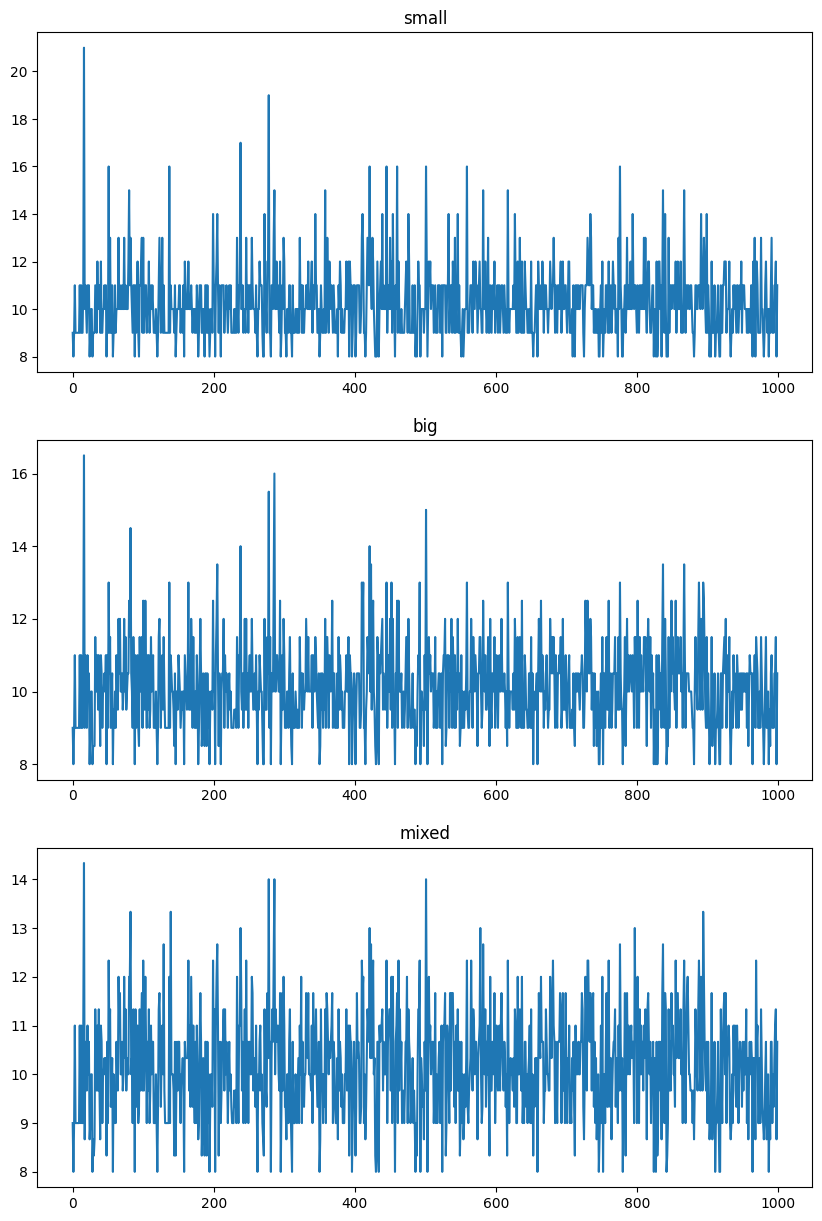

In [11]:
experiment(QLearning, hyper_params)

### discretize_state_croped

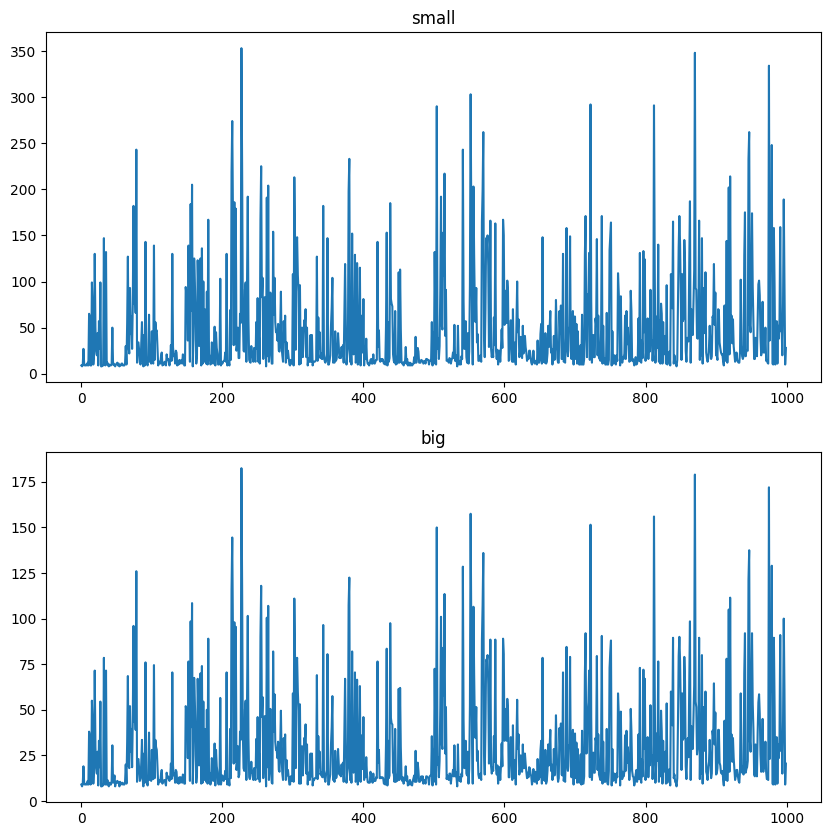

In [12]:
hyper_params = [
        {'title': 'small', "state_shape": (10, 10), "discretizer":disc.discretize_state_croped},
        {'title': 'big', "state_shape": (100, 100), "discretizer":disc.discretize_state_croped},
    ]

experiment(SARSA, hyper_params)

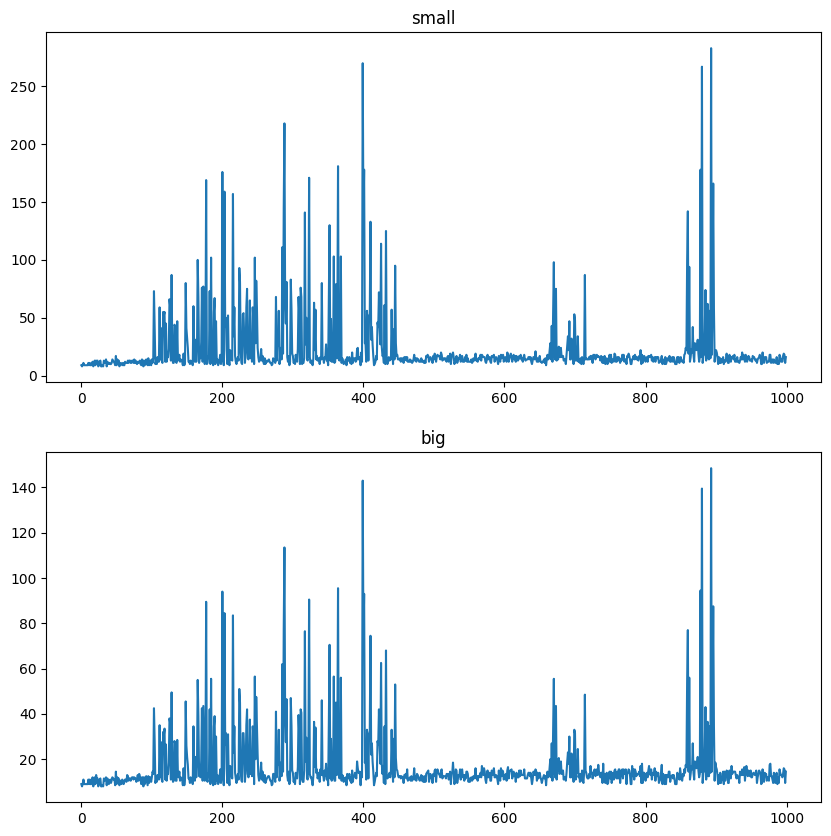

In [13]:
experiment(QLearning, hyper_params)

## Resume Discretizers

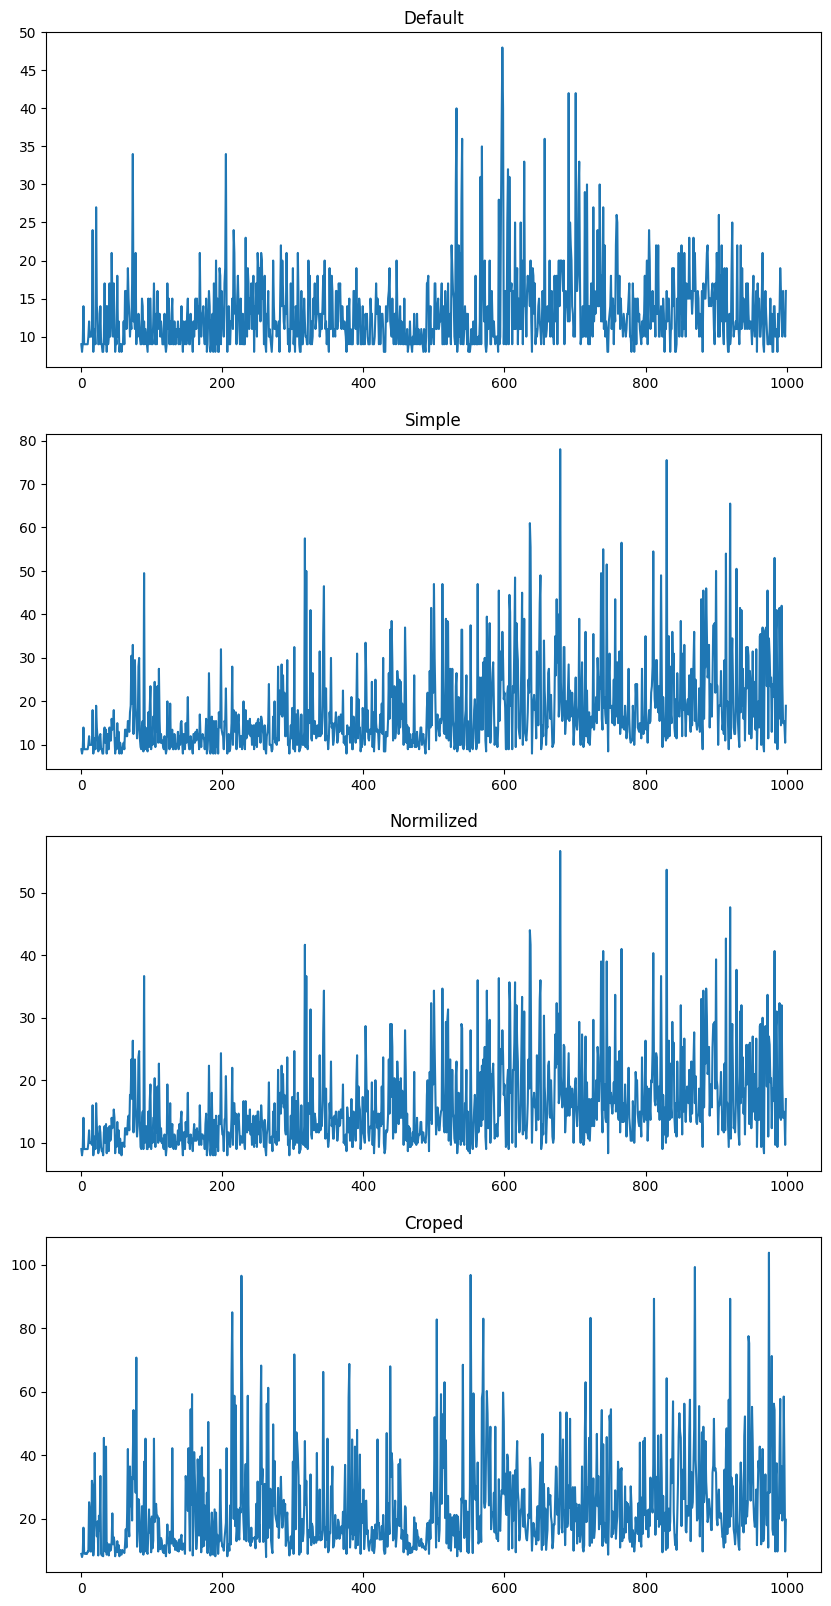

In [27]:
hyper_params = [
        {'title': 'Default'},
        {'title': 'Simple', "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state},
        {'title': 'Normilized', "state_shape": (30, 30, 50, 50), "discretizer":disc.discretize_state_normalized},
        {'title': 'Croped', "state_shape": (10, 10), "discretizer":disc.discretize_state_croped},
    ]

experiment(SARSA, hyper_params)

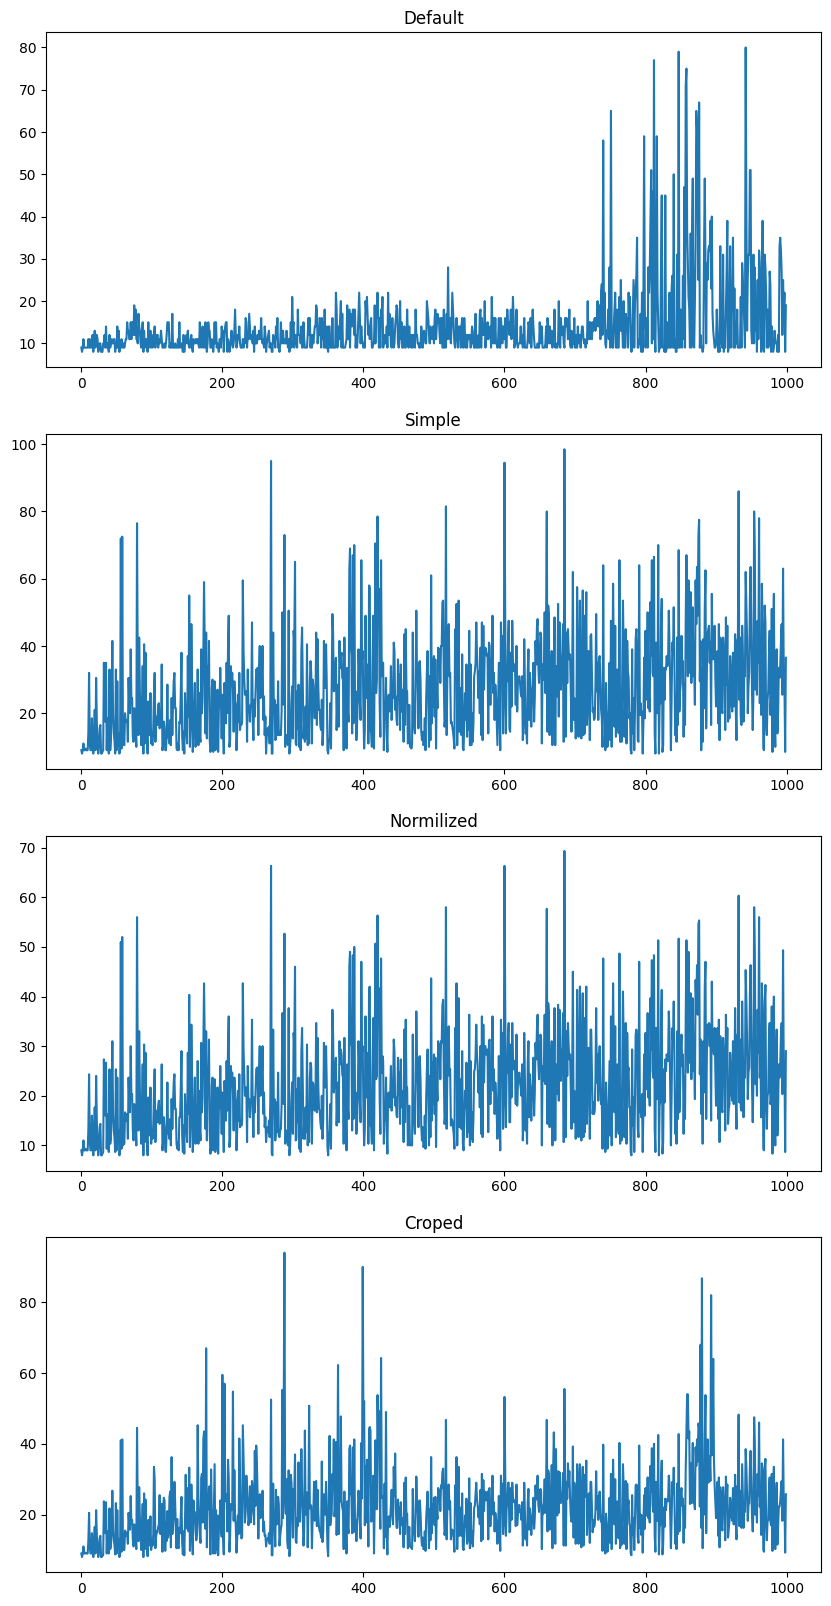

In [28]:
experiment(QLearning, hyper_params)

## Hyperparams

### $\alpha$

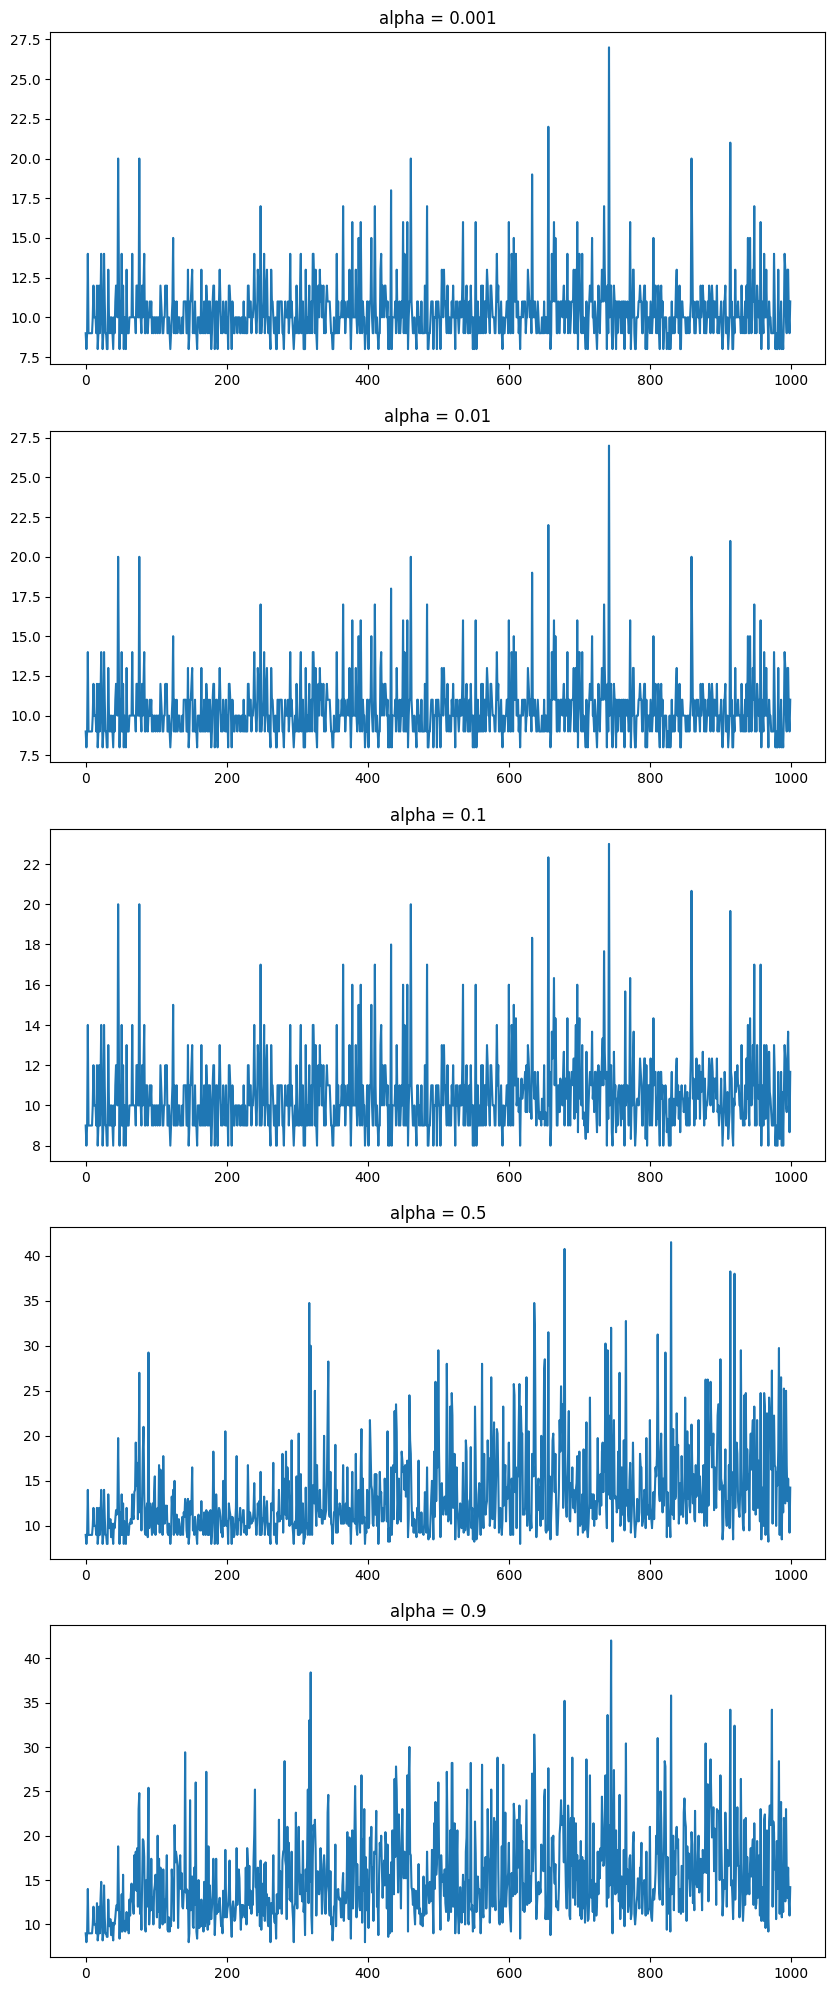

In [16]:
hyper_params = [
        {'title': 'alpha = 0.001', 'alpha': 0.001, "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state},
        {'title': 'alpha = 0.01', 'alpha': 0.01, "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state},
        {'title': 'alpha = 0.1', 'alpha': 0.1, "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state},
        {'title': 'alpha = 0.5', 'alpha': 0.5, "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state},
        {'title': 'alpha = 0.9', 'alpha': 0.9, "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state}
    ]

experiment(SARSA, hyper_params)

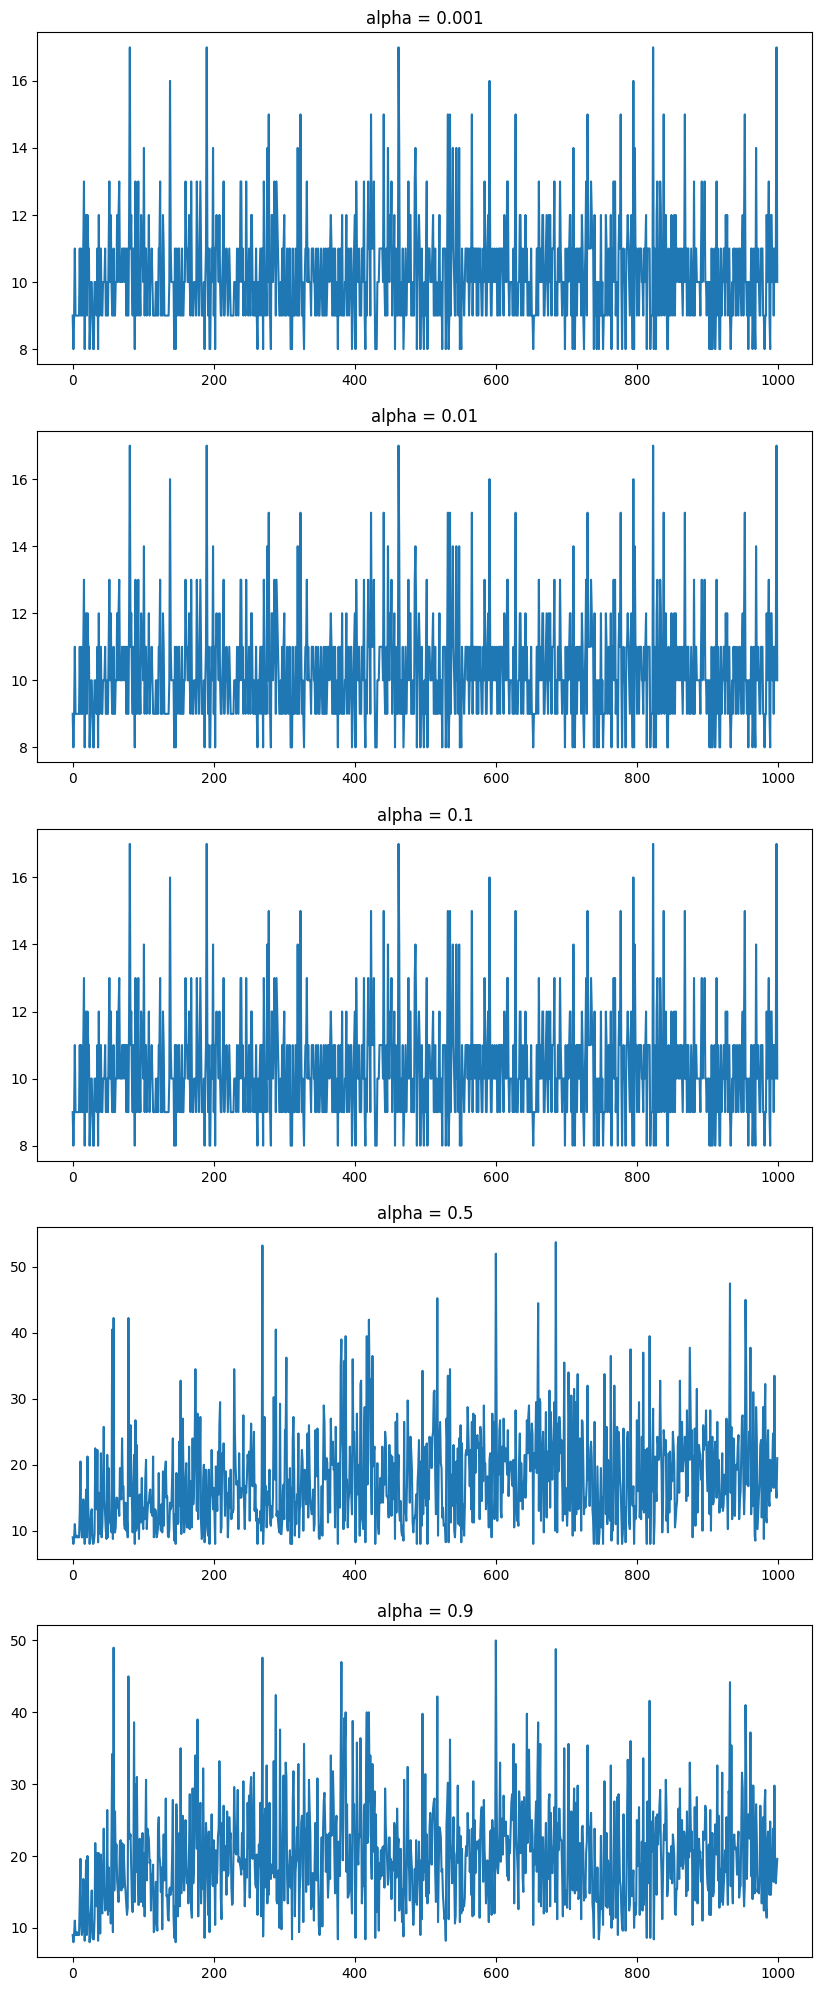

In [17]:
experiment(QLearning, hyper_params)

### $\gamma$

c:\Users\guilherme.albarrans\OneDrive - Ame Digital\Área de Trabalho\RL\planejamento\EP2\agents.py:129: RuntimeWarning: overflow encountered in scalar multiply
  self.Q[(*S, A)] += self.alpha*(R + self.gamma*self.Q[(*S_, A_)] - self.Q[(*S, A)])
c:\Users\guilherme.albarrans\OneDrive - Ame Digital\Área de Trabalho\RL\planejamento\EP2\agents.py:129: RuntimeWarning: invalid value encountered in scalar subtract
  self.Q[(*S, A)] += self.alpha*(R + self.gamma*self.Q[(*S_, A_)] - self.Q[(*S, A)])
c:\Users\guilherme.albarrans\OneDrive - Ame Digital\Área de Trabalho\RL\planejamento\EP2\agents.py:129: RuntimeWarning: invalid value encountered in scalar add
  self.Q[(*S, A)] += self.alpha*(R + self.gamma*self.Q[(*S_, A_)] - self.Q[(*S, A)])
c:\Users\guilherme.albarrans\OneDrive - Ame Digital\Área de Trabalho\RL\planejamento\EP2\agents.py:129: RuntimeWarning: overflow encountered in scalar multiply
  self.Q[(*S, A)] += self.alpha*(R + self.gamma*self.Q[(*S_, A_)] - self.Q[(*S, A)])
c:\Users\guilhe

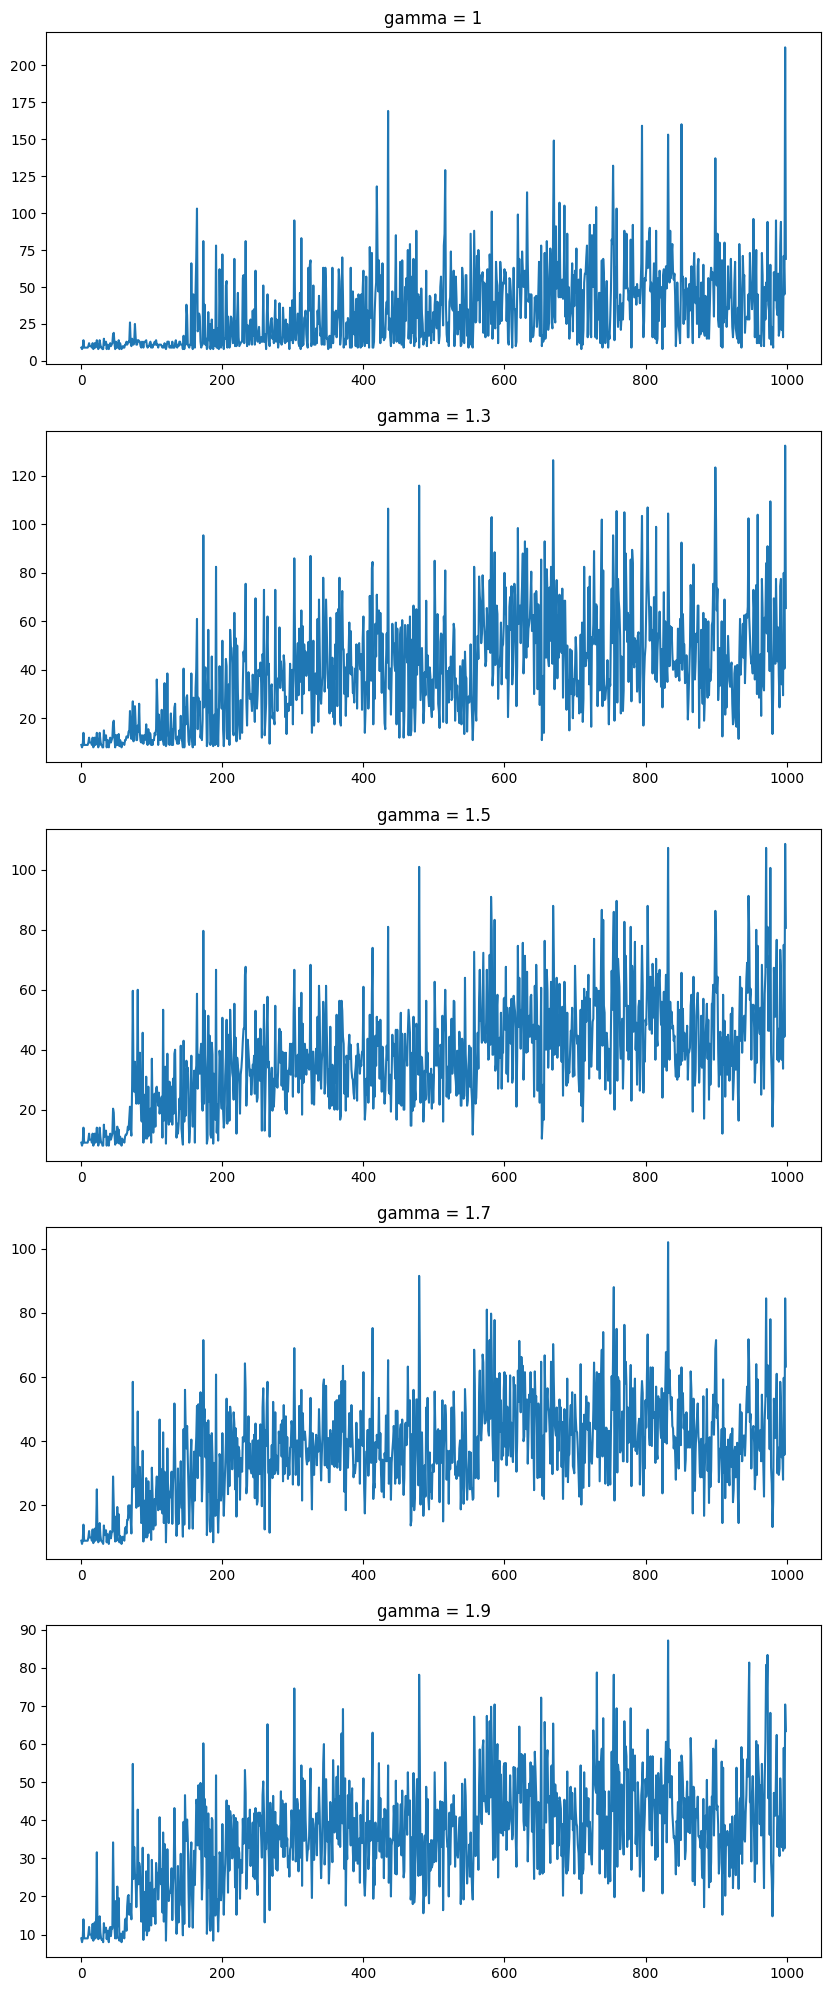

In [29]:
hyper_params = [
        {'title': 'gamma = 1', 'gamma': 1, "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state},
        {'title': 'gamma = 1.3', 'gamma': 1.3, "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state},
        {'title': 'gamma = 1.5', 'gamma': 1.5, "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state},
        {'title': 'gamma = 1.7', 'gamma': 1.7, "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state},
        {'title': 'gamma = 1.9', 'gamma': 1.9, "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state}
    ]

experiment(SARSA, hyper_params)

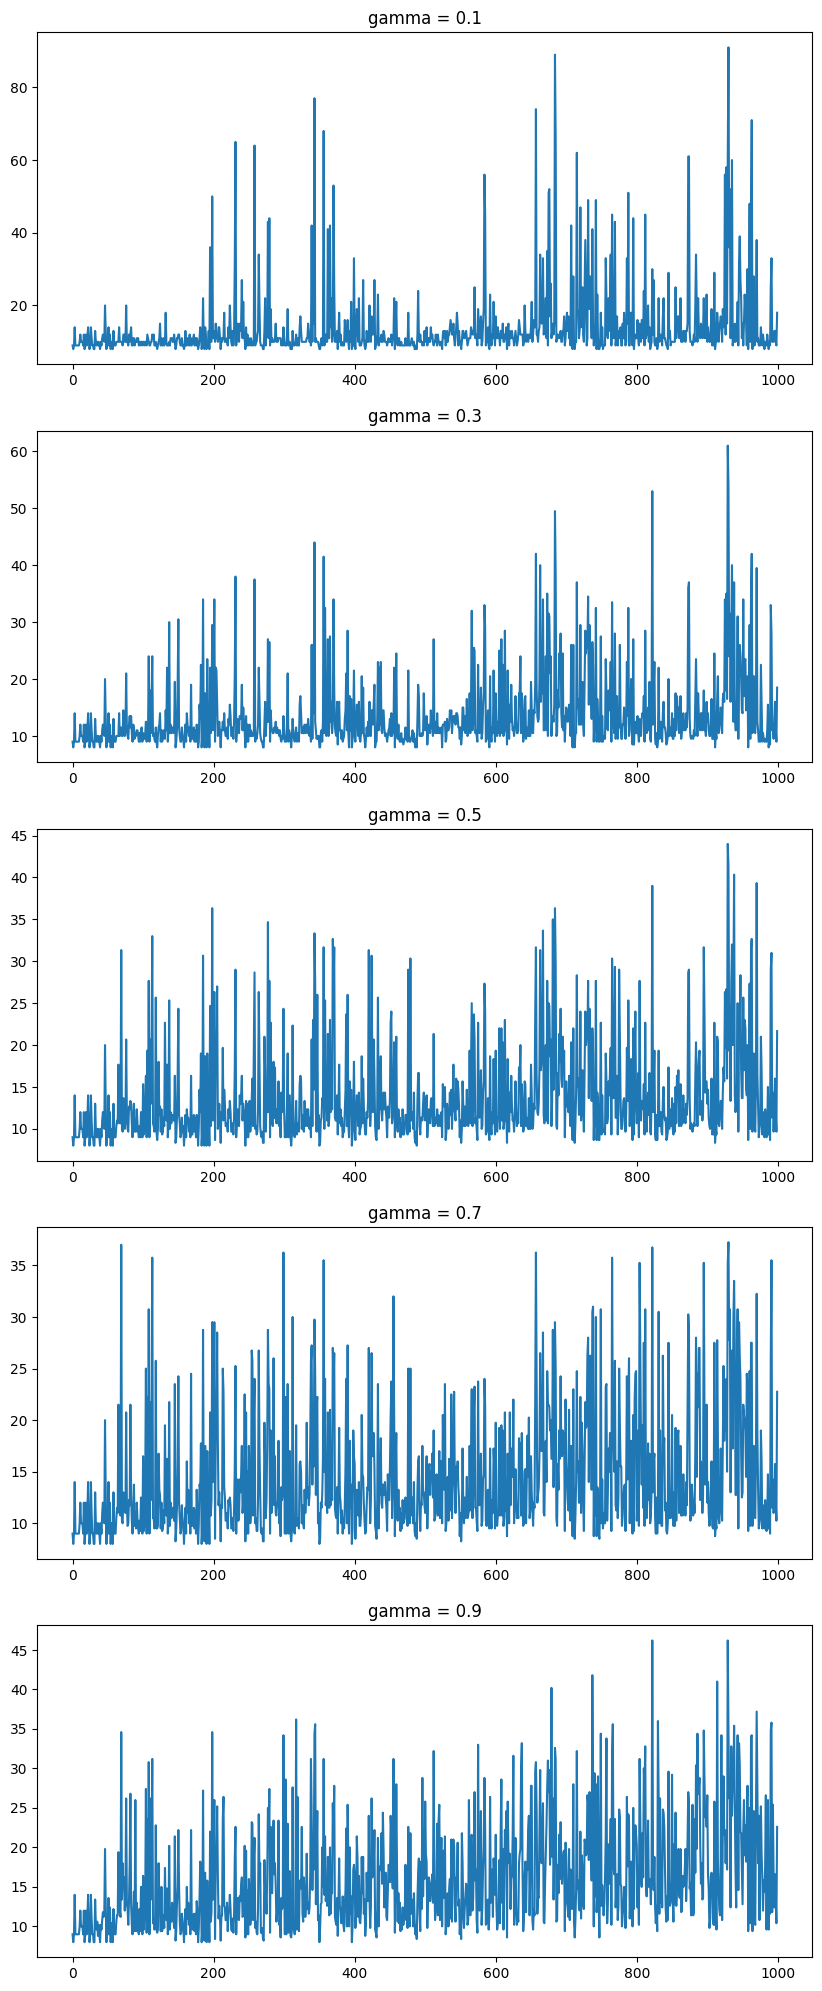

In [18]:
hyper_params = [
        {'title': 'gamma = 0.1', 'gamma': 0.1, "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state},
        {'title': 'gamma = 0.3', 'gamma': 0.3, "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state},
        {'title': 'gamma = 0.5', 'gamma': 0.5, "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state},
        {'title': 'gamma = 0.7', 'gamma': 0.7, "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state},
        {'title': 'gamma = 0.9', 'gamma': 0.9, "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state}
    ]

experiment(SARSA, hyper_params)

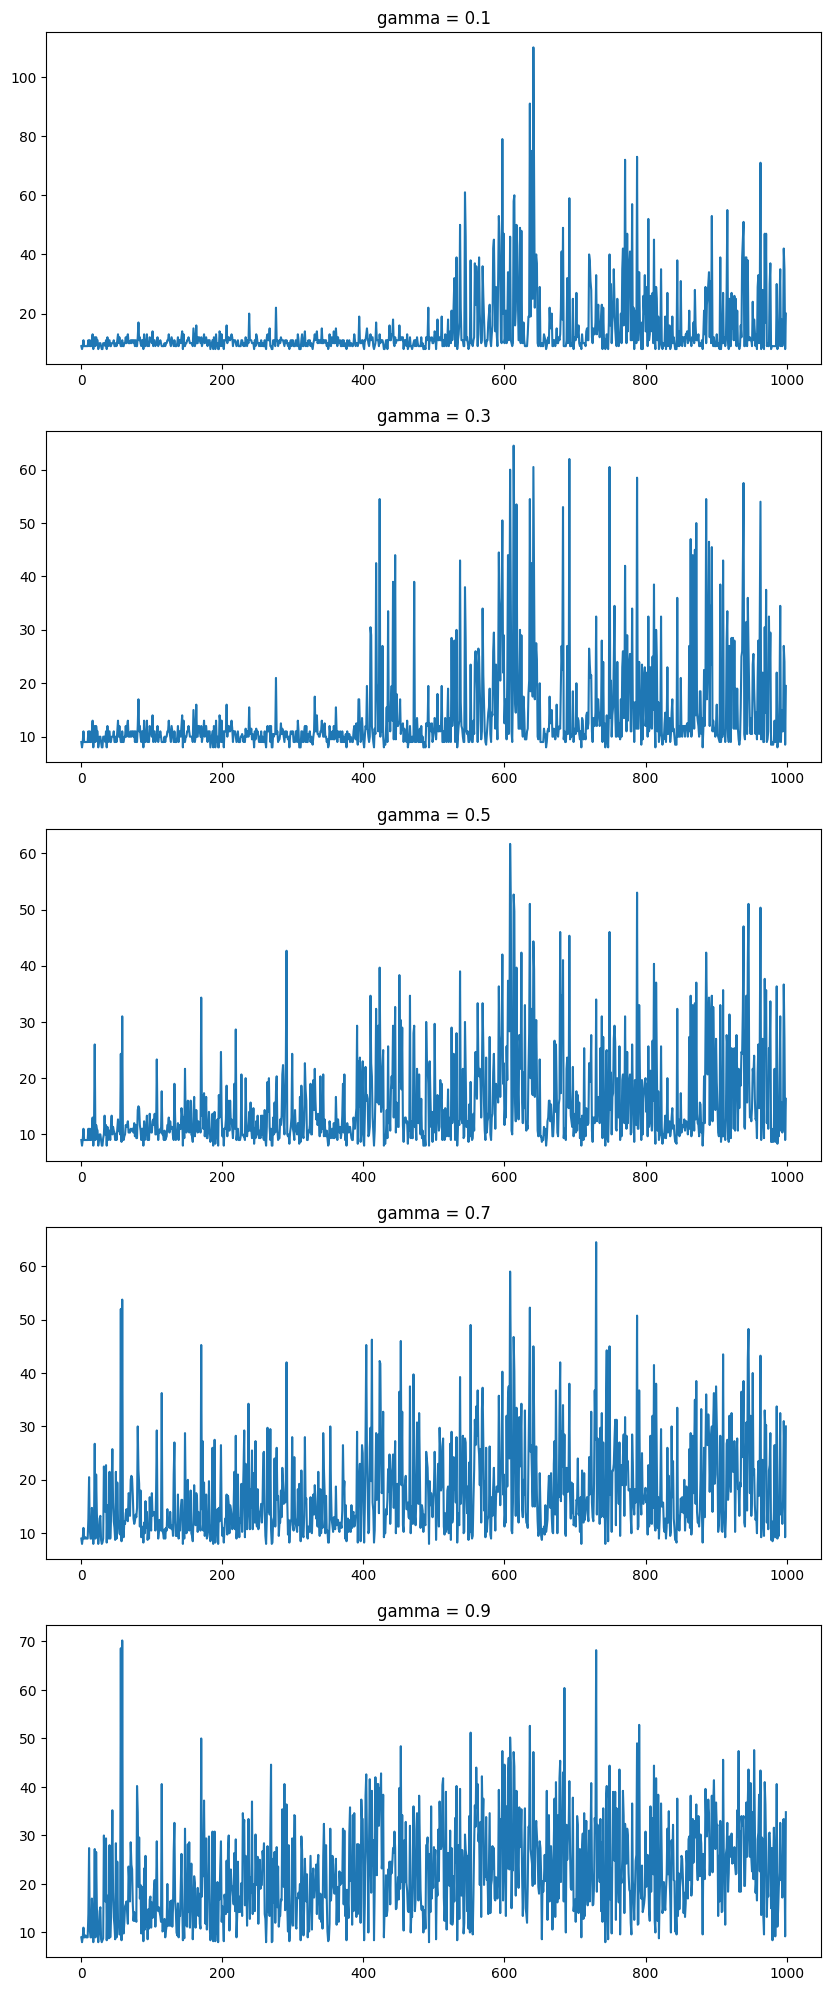

In [19]:
experiment(QLearning, hyper_params)

### $\epsilon$

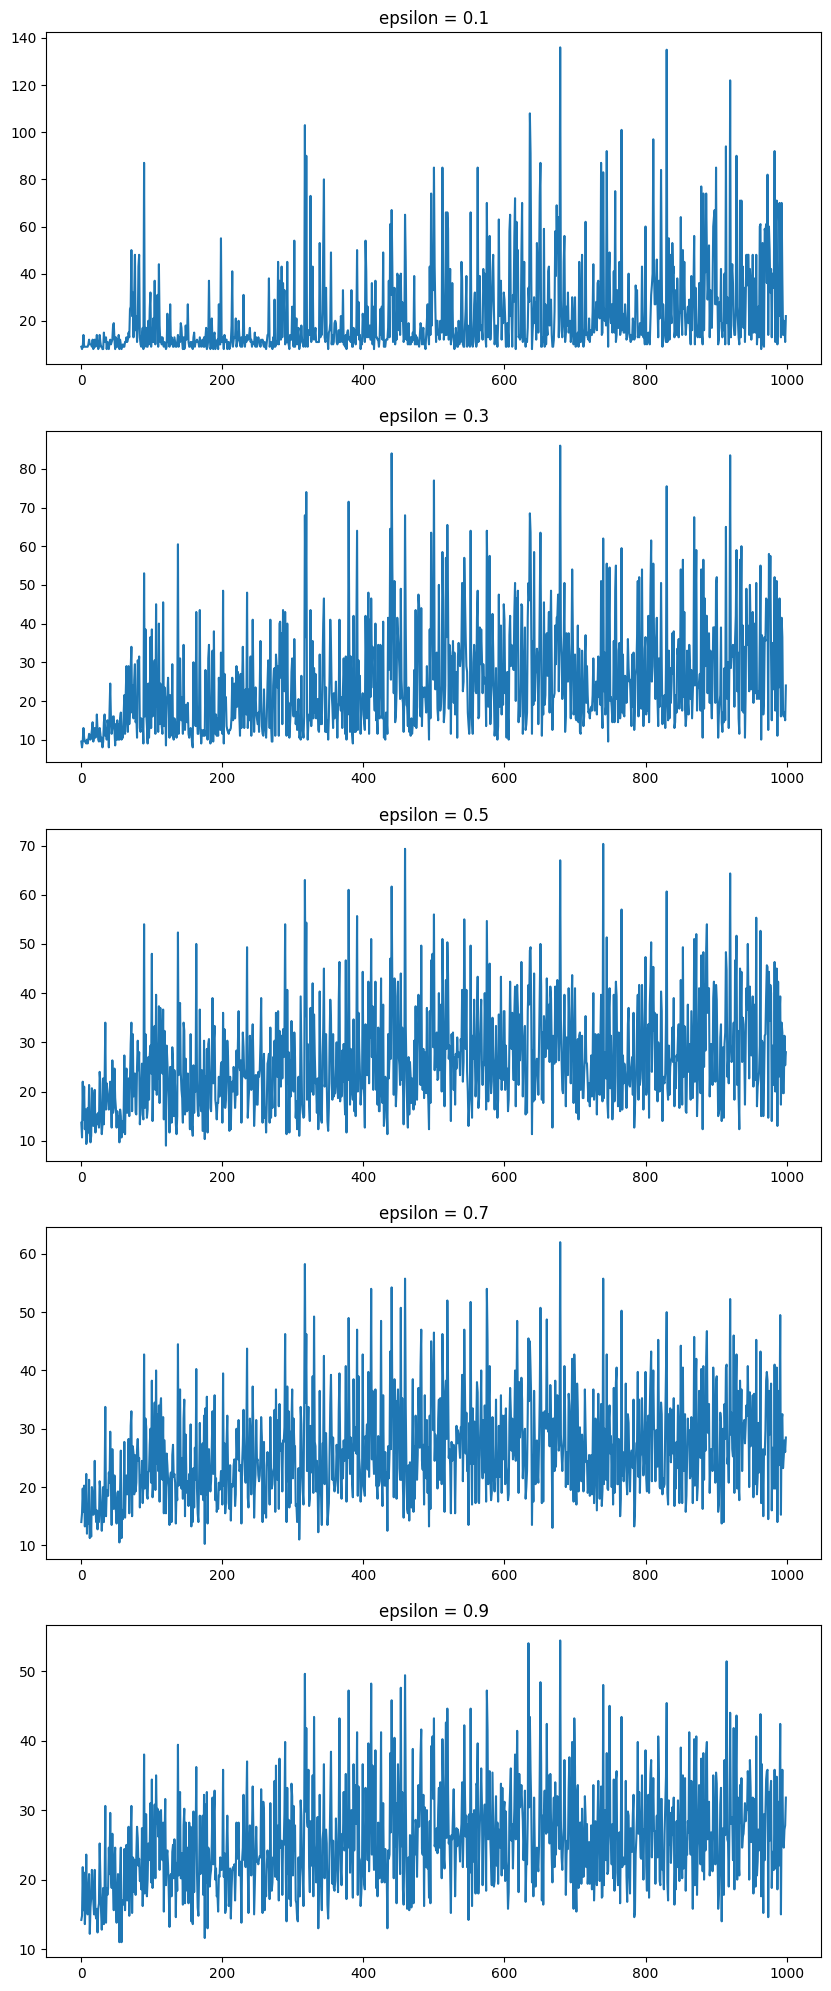

In [20]:
hyper_params = [
        {'title': 'epsilon = 0.1', 'epsilon': 0.1, "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state},
        {'title': 'epsilon = 0.3', 'epsilon': 0.3, "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state},
        {'title': 'epsilon = 0.5', 'epsilon': 0.5, "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state},
        {'title': 'epsilon = 0.7', 'epsilon': 0.7, "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state},
        {'title': 'epsilon = 0.9', 'epsilon': 0.9, "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state}
    ]

experiment(SARSA, hyper_params)

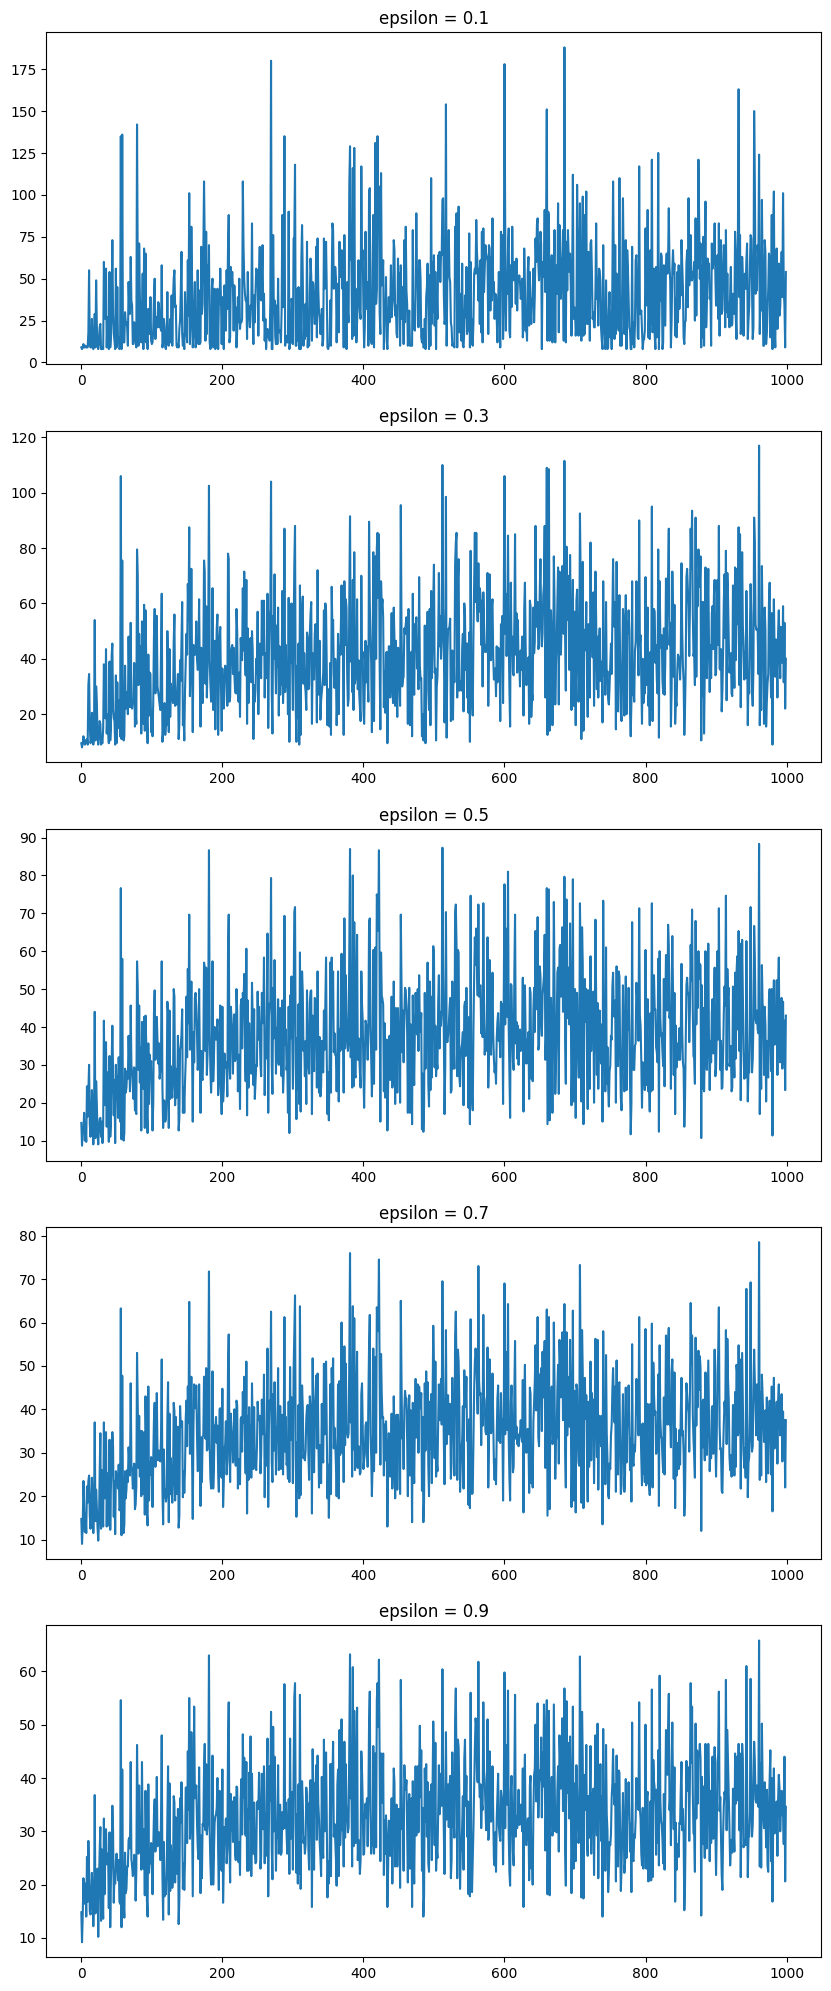

In [21]:
experiment(QLearning, hyper_params)

## Resume Hyperparams

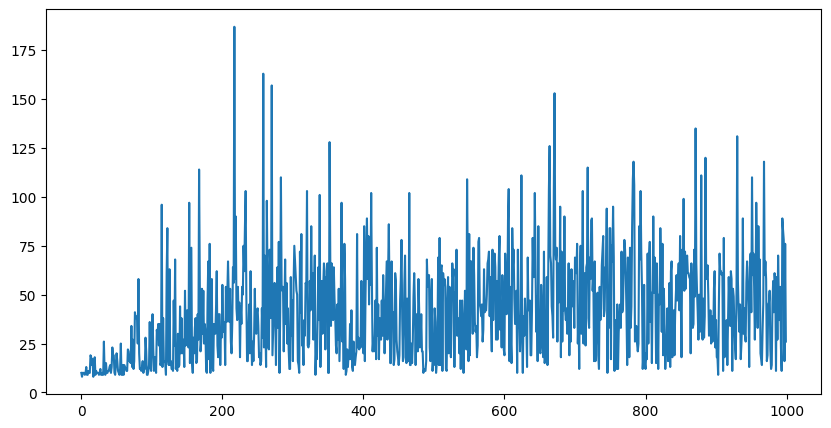

In [32]:
hyper_params = [
        {'title': None, 'alpha': 0.5, 'gamma': 1, 'epsilon': 0.2, "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state}
    ]

experiment(SARSA, hyper_params)

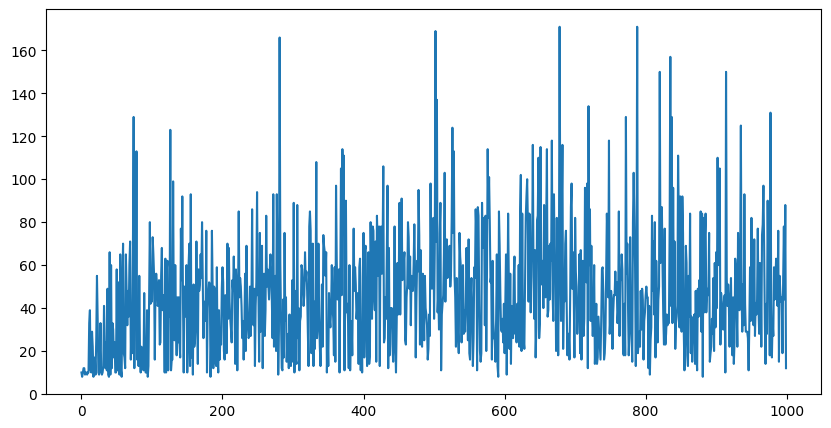

In [33]:
experiment(QLearning, hyper_params)

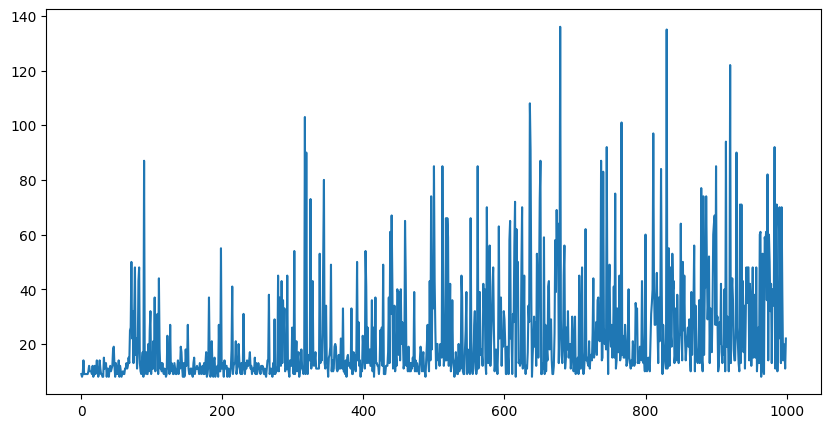

In [22]:
hyper_params = [
        {'title': None, 'alpha': 0.5, 'gamma': 0.9, 'epsilon': 0.1, "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state}
    ]

experiment(SARSA, hyper_params)

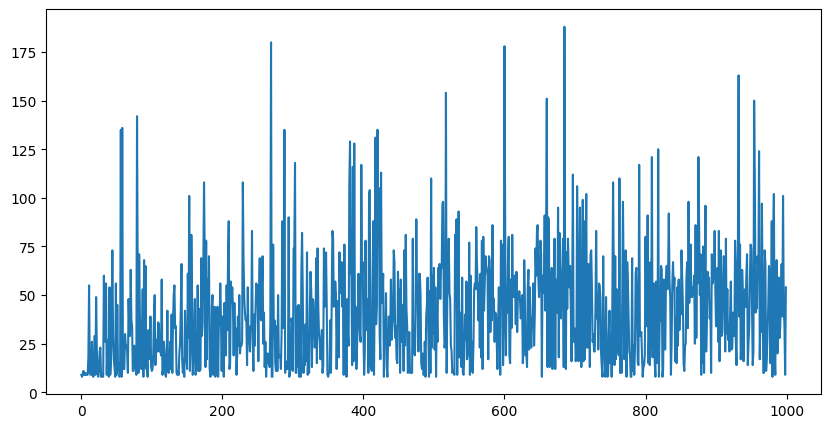

In [23]:
experiment(QLearning, hyper_params)

## #Episodes

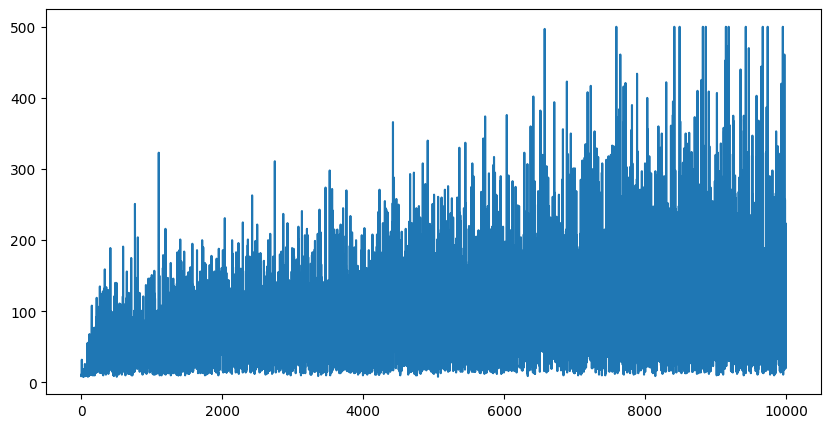

In [34]:
experiment(QLearning, 
           [{'title': None, 'alpha': 0.5, 'gamma': 1, 'epsilon': 0.2, "state_shape": (10, 10, 10, 10), "discretizer":disc.simple_discretized_state}],
           episodes=10000
           )